In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import collections
import spacy
import emoji

In [2]:
df = pd.read_csv(r"C:\Users\Julius Chris\Desktop\dataset_fix.csv",encoding= 'unicode_escape')

In [3]:
#df = df.drop(['id','date','Unnamed: 0','screen_name'],axis=1)

In [4]:
def drawbarplot(x,y,xlabel,title,figsize=(10,10)):
    plt.figure(figsize=figsize)    
    sns.barplot(x=x,y=y,palette = 'terrain',orient='h',order=y)
    for i,v in enumerate(x):
        plt.text(0.8,i,v,color='k',fontsize=10)
    
    plt.title(title,fontsize=20)
    plt.xlabel(xlabel,fontsize =14)
    plt.show()

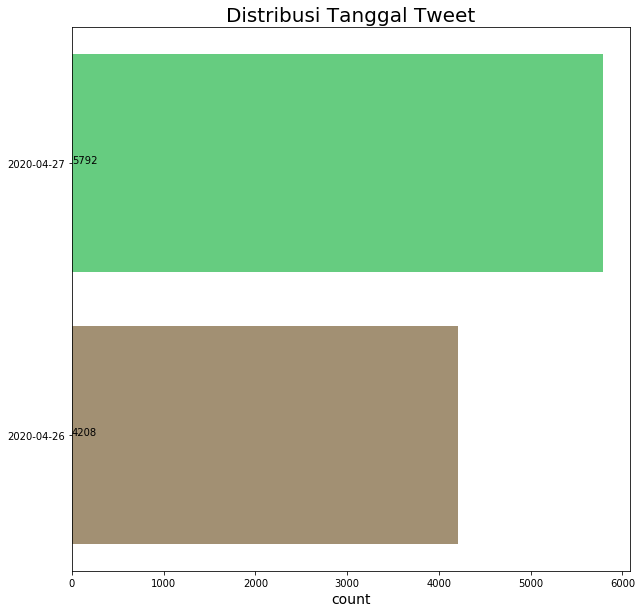

In [5]:
count =  df['date'].value_counts()
drawbarplot(x=count.values,y=count.index,xlabel='count',title='Distribusi Tanggal Tweet',figsize=(10,10))

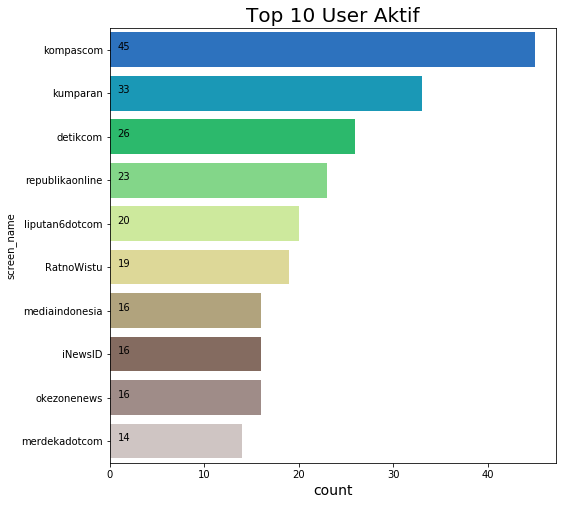

In [6]:
#Which user is most active on twitter
count=df['screen_name'].value_counts()
df_count=pd.DataFrame()
df_count['screen_name'] = count.index
df_count['activeCount'] = count.values
df_count = df_count.iloc[:10,:]
drawbarplot(x=df_count.activeCount,y=df_count.screen_name,xlabel='count',title='Top 10 User Aktif',figsize=(8,8))

In [7]:
#function to extract @mentions and #tags
def extracter():
    mentions={}
    tags={}
    for i in df_trend_user.index:
        tokens = df_trend_user['text'][i].split()    
        for token in tokens:
            if('@' in token[0] and len(token) > 1):
                if token.strip('@') in mentions:
                    mentions[token.strip('@')] += 1
                else:
                    mentions[token.strip('@')] = 1
        
        
            if('#' in token[0] and len(token) > 1):
                if token.strip('#') in tags:
                    tags[token.strip('#')] += 1
                else:
                    tags[token.strip('#')] = 1    
                    
    return mentions,tags   

In [8]:
df_trend_user = df.loc[:,['text']]
mentions ,tags = extracter()

mentions_keys = list(mentions.keys())
mentions_values = list(mentions.values())
tags_keys = list(tags.keys())
tags_values = list(tags.values())

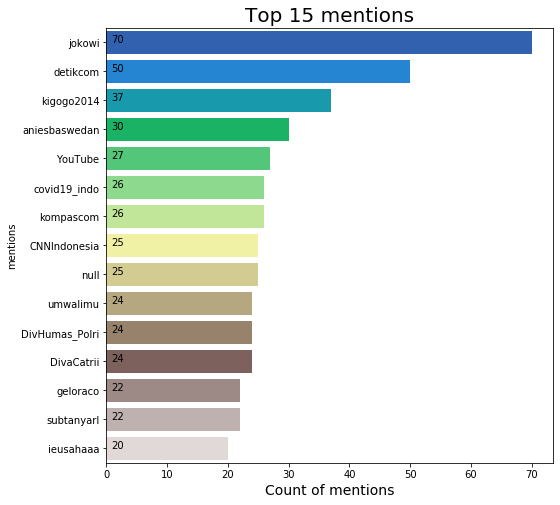

In [9]:
df_mention = pd.DataFrame(columns=['mentions','m_count'])
df_mention['mentions'] = mentions_keys
df_mention['m_count'] = mentions_values
df_mention.sort_values(ascending=False,by='m_count',inplace=True)
df_count = df_mention.iloc[:15,:]
drawbarplot(x=df_count.m_count,y=df_count.mentions,xlabel='Count of mentions',title='Top 15 mentions',figsize=(8,8))

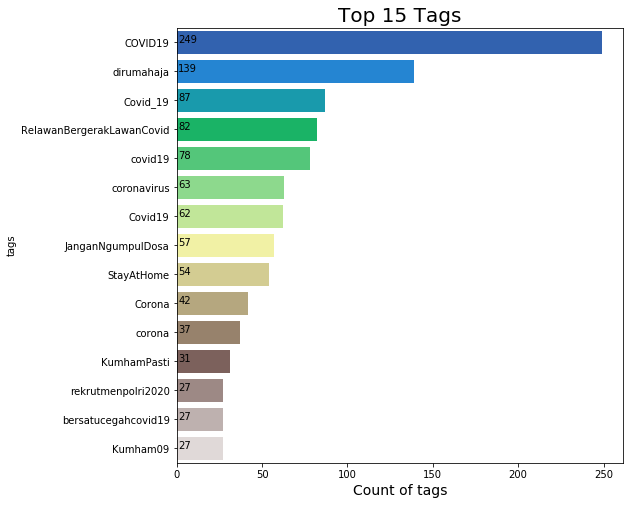

In [10]:
df_tags =pd.DataFrame(columns=['tags','t_count'])
df_tags['tags'] = tags_keys
df_tags['t_count'] = tags_values
df_tags.sort_values(ascending=False,by='t_count',inplace=True)
df_count = df_tags.iloc[:15,:]
drawbarplot(x=df_count.t_count,y=df_count.tags,xlabel='Count of tags',title='Top 15 Tags',figsize=(8,8))

In [11]:
df.text[9]

'Hadehh ya bulan puasa masa kelonan m swami orang <U+0001F606> istri macem apakah \r\n\r\nMudik karena Corona, Pria di Wonogiri Malah Pergoki Istrinya Lagi Kelonan Dengan Oknum Kades https://t.co/ni7HiXjoKt'

In [12]:
df[df.rt > 200].sort_values(by = 'rt',ascending=False)

Unnamed: 0     id        date    screen_name  \
4245       90011  90011  2020-04-26   CNNIndonesia   
9946       19525  19525  2020-04-27   CNNIndonesia   
2506       78965  78965  2020-04-26       arwidodo   
6427          25     25  2020-04-27      bharianmy   
8545       29681  29681  2020-04-27  geiszchalifah   
5072       93137  93137  2020-04-26     KemenkesRI   
8368       24535  24535  2020-04-27         MCAOps   

                                                   text  \
4245  #DataTerbaruCorona\r\nAngka kesembuhan pasien ...   
9946  #DataTerbaruCorona\r\nSebanyak 1.151 pasien di...   
2506  Sedih benar nasib Junaidi Rahman. Beberapa har...   
6427  Sebahagian pelajar IPTA dan IPTS, Politeknik d...   
8545  Kita semua tercekam dgn virus korona ini, kita...   
5072  Update situasi terkini perkembangan #COVID19 d...   
8368  FPI menggelar kerja bakti dan memberikan bantu...   

                                     pre_processed_text    rt  like  
4245  angka kesembuhan pasien positif cenderung ming...  1011  1649  
9946  pasien dinyatakan sembuh kali hasil tesnya neg...   882  1166  
2506  sedih nasib junaidi rahman makan akibat covid ...   350   492  
6427  sebahagian pelajar ipta ipts politeknik kolej ...   332   554  
8545  tercekam dgn virus korona berusaha dgn sekuat ...   313  1484  
5072  update situasi terkini perkembangan indonesia ...   286   406  
8368  fpi menggelar kerja bakti bantuan vihara darma...   243   545

In [13]:
df[df.rt > 200].sort_values(by = 'like',ascending=False)

Unnamed: 0     id        date    screen_name  \
4245       90011  90011  2020-04-26   CNNIndonesia   
8545       29681  29681  2020-04-27  geiszchalifah   
9946       19525  19525  2020-04-27   CNNIndonesia   
6427          25     25  2020-04-27      bharianmy   
8368       24535  24535  2020-04-27         MCAOps   
2506       78965  78965  2020-04-26       arwidodo   
5072       93137  93137  2020-04-26     KemenkesRI   

                                                   text  \
4245  #DataTerbaruCorona\r\nAngka kesembuhan pasien ...   
8545  Kita semua tercekam dgn virus korona ini, kita...   
9946  #DataTerbaruCorona\r\nSebanyak 1.151 pasien di...   
6427  Sebahagian pelajar IPTA dan IPTS, Politeknik d...   
8368  FPI menggelar kerja bakti dan memberikan bantu...   
2506  Sedih benar nasib Junaidi Rahman. Beberapa har...   
5072  Update situasi terkini perkembangan #COVID19 d...   

                                     pre_processed_text    rt  like  
4245  angka kesembuhan pasien positif cenderung ming...  1011  1649  
8545  tercekam dgn virus korona berusaha dgn sekuat ...   313  1484  
9946  pasien dinyatakan sembuh kali hasil tesnya neg...   882  1166  
6427  sebahagian pelajar ipta ipts politeknik kolej ...   332   554  
8368  fpi menggelar kerja bakti bantuan vihara darma...   243   545  
2506  sedih nasib junaidi rahman makan akibat covid ...   350   492  
5072  update situasi terkini perkembangan indonesia ...   286   406

In [14]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
st_words = set(stopwords.words('english')) 
#enhancing stopword by removing @mentions and shorthands
st_words.update(['https','CO','RT','Please','via','amp','place','new','ttot','best','great','top','ht','ysecrettravel','ysecrettravel_'])
st_words.update([s.lower() for s in mentions_keys])

You should consider upgrading via the 'c:\users\julius chris\anaconda3\python.exe -m pip install --upgrade pip' command.


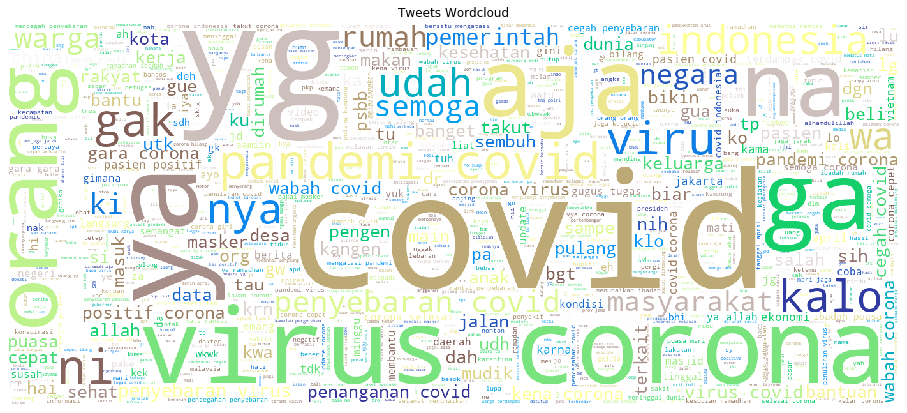

In [15]:
wc = WordCloud(height=600,repeat=False,width=1400,max_words=1000,stopwords=st_words,colormap='terrain',background_color='white',mode='RGBA').generate(' '.join(df['pre_processed_text'].dropna().astype(str)))
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.title('Tweets Wordcloud')
plt.axis('off')
plt.show()

In [16]:
#Baseestimator class to extract fetures from tweetbody

class TextCounts(BaseEstimator, TransformerMixin):
    
    def count_regex(self, pattern, tweet):
        return len(re.findall(pattern, tweet))
    
    def fit(self, X, y=None, **fit_params):
        # fit method is used when specific operations need to be done on the train data, but not on the test data
        return self
    
    def transform(self, X, **transform_params):
        count_words = X.apply(lambda x: self.count_regex(r'\w+', x)) 
        count_mentions = X.apply(lambda x: self.count_regex(r'@\w+', x))
        count_hashtags = X.apply(lambda x: self.count_regex(r'#\w+', x))
        #count_capital_words = X.apply(lambda x: self.count_regex(r'\b[A-Z]{2,}\b', x))
        #count_excl_quest_marks = X.apply(lambda x: self.count_regex(r'!|\?', x))
        count_urls = X.apply(lambda x: self.count_regex(r'http.?://[^\s]+[\s]?', x))
        # We will replace the emoji symbols with a description, which makes using a regex for counting easier
        # Moreover, it will result in having more words in the tweet
        count_emojis = X.apply(lambda x: emoji.demojize(x)).apply(lambda x: self.count_regex(r':[a-z_&]+:', x))
        
        df = pd.DataFrame({'count_words': count_words
                           , 'count_mentions': count_mentions
                           , 'count_hashtags': count_hashtags                           
                           , 'count_urls': count_urls
                           , 'count_emojis': count_emojis
                          })
        
        return df
    

In [17]:
df_final = df.drop(['Unnamed: 0', 'id', 'date', 'screen_name', 'pre_processed_text',
       'rt', 'like'],axis=1)

In [18]:
import re
tc = TextCounts()
df_feature =  tc.fit_transform(df_final['text'])
df_feature.head(10)

count_words  count_mentions  count_hashtags  count_urls  count_emojis
0           18               0               0           1             0
1            4               1               0           0             0
2           34               0               0           1             0
3           26               0               0           1             0
4           32               1               0           0             0
5           52               1               0           1             0
6           56               2               0           1             0
7           20               1               0           0             0
8           43               7               5           0             0
9           32               0               0           1             0

In [19]:
'''from sklearn.base import BaseEstimator, TransformerMixin
class CleanText(BaseEstimator, TransformerMixin):
    def remove_mentions(self, input_text):
        return re.sub(r'@\w+', '', input_text)
    
    def remove_urls(self, input_text):
        return re.sub(r'http.?://[^\s]+[\s]?', '', input_text)
    
    def emoji_oneword(self, input_text):
        # By compressing the underscore, the emoji is kept as one word
        return input_text.replace('_','')
    
    def remove_punctuation(self, input_text):
        # Make translation table
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')  # Every punctuation symbol will be replaced by a space
        return input_text.translate(trantab)

    def remove_digits(self, input_text):
        return re.sub('\d+', '', input_text)
    
    def to_lower(self, input_text):
        return input_text.lower()
    
    def remove_stopwords(self, input_text):
        #stopwords_list = st_words
        stopwords_list=STOPWORDS
        # Some words which might indicate a certain sentiment are kept via a whitelist        
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list) and len(word) > 1] 
        return " ".join(clean_words) 
    
    def stemming(self, input_text):
        porter = PorterStemmer()
        words = input_text.split() 
        stemmed_words = [porter.stem(word) for word in words]
        return " ".join(stemmed_words)
    
    def fit(self, X, y=None, **fit_params):
        return self
    
    def transform(self, X, **transform_params):
        clean_X = X.apply(self.remove_mentions).apply(self.remove_urls).apply(self.emoji_oneword).apply(self.remove_punctuation).apply(self.remove_digits).apply(self.to_lower).apply(self.remove_stopwords).apply(self.stemming)        
        return clean_X'''

'from sklearn.base import BaseEstimator, TransformerMixin\nclass CleanText(BaseEstimator, TransformerMixin):\n    def remove_mentions(self, input_text):\n        return re.sub(r\'@\\w+\', \'\', input_text)\n    \n    def remove_urls(self, input_text):\n        return re.sub(r\'http.?://[^\\s]+[\\s]?\', \'\', input_text)\n    \n    def emoji_oneword(self, input_text):\n        # By compressing the underscore, the emoji is kept as one word\n        return input_text.replace(\'_\',\'\')\n    \n    def remove_punctuation(self, input_text):\n        # Make translation table\n        punct = string.punctuation\n        trantab = str.maketrans(punct, len(punct)*\' \')  # Every punctuation symbol will be replaced by a space\n        return input_text.translate(trantab)\n\n    def remove_digits(self, input_text):\n        return re.sub(\'\\d+\', \'\', input_text)\n    \n    def to_lower(self, input_text):\n        return input_text.lower()\n    \n    def remove_stopwords(self, input_text):\n   

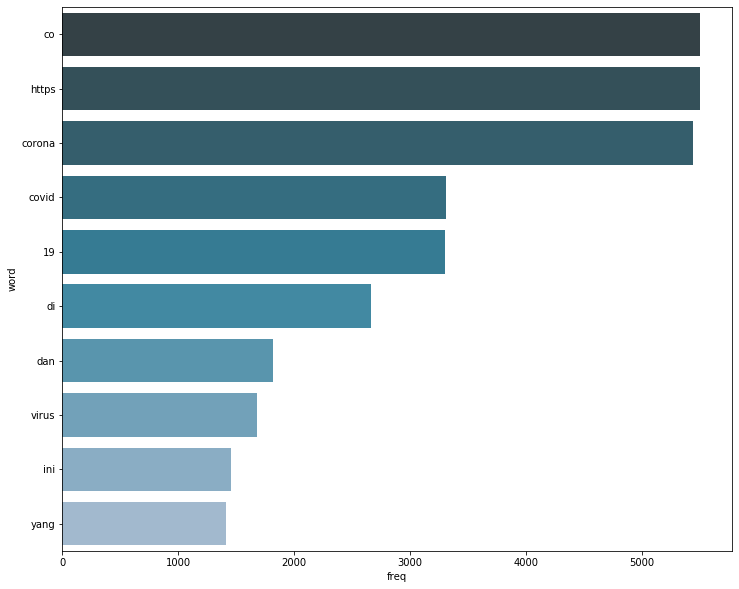

In [20]:
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
cv = CountVectorizer()
bow = cv.fit_transform(df_final['text'])
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(10), columns = ['word', 'freq'])

fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(y="word", x="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax,orient='h')
plt.show();

#Cleaning

In [21]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))
df[['text','word_count']].head()

text  word_count
0  Siiip !!!! Target Pemerintah: Juni angka coron...          16
1                    @Fckpencitraan tes corona cuk:(           4
2  Assalamualaikum wr. wb. \r\n\r\nGotong Royong ...          28
3  Jangan karena covid19, Urusan Ibadah Umat di-a...          21
4  @podoradong China + CHO(who) + billgate + part...          37

In [22]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'screen_name', 'text', 'pre_processed_text',
       'rt', 'like', 'word_count'],
      dtype='object')

In [23]:
df['word_count'] = [len(t) for t in df.text]

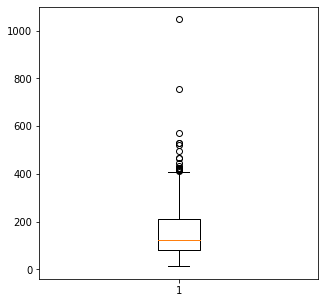

In [24]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.word_count)
plt.title("")
plt.show()

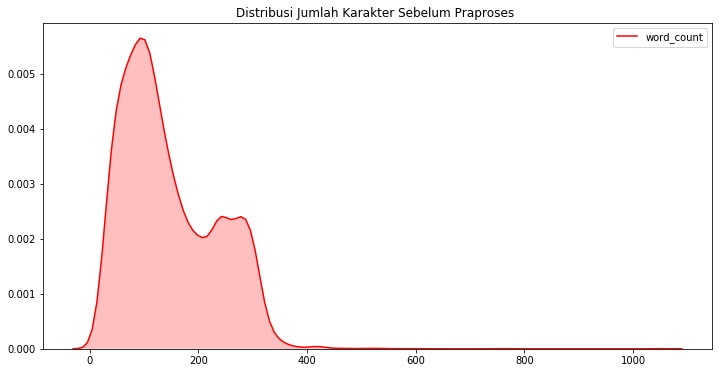

In [25]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(df['word_count'], shade=True, color="r").set_title('Distribusi Jumlah Karakter Sebelum Praproses ')

This looks a bit strange, since the twitter’s character limit is 280. But from the above box plot, some of the tweets are way more than 280 characters long.

In [26]:
df[df.word_count > 280].head()

Unnamed: 0      id        date      screen_name  \
5        38337   38337  2020-04-27  natalia68571030   
6       100160  100160  2020-04-26       Hired_thug   
22       96010   96010  2020-04-26   KajianKantoran   
31       74056   74056  2020-04-26         zaphanay   
35       58023   58023  2020-04-27   LaskarPiningit   

                                                 text  \
5   @ernestprakasa Untuk saat ini karena ada VIRUS...   
6   Tukimalizana na Hii corona inshallah <U+0001F6...   
22  Menyempurnakan Taqwa<U+2063><U+2063>\r\n<U+206...   
31  @dominicktanzan1 @VitusNkuna @ChademaTz @Maria...   
35  @J0ebr1k2 @willona_007 @Arifin__8482 @GHiugo @...   

                                   pre_processed_text  rt  like  word_count  
5   virus corona diperbolehkan rumah uang masuk bi...   0     0         319  
6                tukimalizana na hii corona inshallah   0     1         362  
22       menyempurnakan taqwa cinta quran foundation
   0     0         298  
31  mama ako kagawia hata jirani barakoa moja tumi...   0     0         466  
35  yuk nerusin tidur lur udh ngantuk jam segini u...   0     1         283

In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Julius
[nltk_data]     Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
stop_words = stopwords.words("indonesian")
stemmer = SnowballStemmer("english")

In [29]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'screen_name', 'text', 'pre_processed_text',
       'rt', 'like', 'word_count'],
      dtype='object')

In [30]:
# DATASET
DATASET_COLUMNS = ["id", "date","screen_name","text","rt","like"]
DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.8

# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# WORD2VEC 
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

# KERAS
SEQUENCE_LENGTH = 300
EPOCHS = 8
BATCH_SIZE = 1024

# SENTIMENT
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"
SENTIMENT_THRESHOLDS = (0.4, 0.7)

# EXPORT
KERAS_MODEL = "model.h5"
WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"

In [31]:
stop_words.append('yg')
stop_words.append('ni')
stop_words.append('aja')
stop_words.append('nya')
stop_words.append('na')
stop_words.append('ya')
stop_words.append('ga')
stop_words.append('gak')
stop_words.append('dah')
stop_words.append('ki')
stop_words.append('gua')
stop_words.append('gw')
stop_words.append('gue')
stop_words.append('lu')
stop_words.append('nih')
stop_words.append('hai')
stop_words.append('iya')
stop_words.append('jg')
stop_words.append('amp')
stop_words.append('virus')
stop_words.append('corona')
stop_words.append('covid-19')
stop_words.append('covid')
stop_words.append('covid19')
stop_words.append('19')

In [32]:
df.text.iloc[673]

'Amalfi Italy\r\nvia: ksenyasitdikova\r\n#<U+0E42><U+0E04><U+0E27><U+0E34><U+0E14>19 #COVID19 #<U+0E19><U+0E31><U+0E17><U+0E19><U+0E34><U+0E2A><U+0E32> #<U+0E41><U+0E01><U+0E07><U+0E40><U+0E02><U+0E35><U+0E22><U+0E27><U+0E2B><U+0E27><U+0E32><U+0E19>250 #KIMJONGUNDEAD #<U+0E41><U+0E17><U+0E19><U+0E19><U+0E35><U+0E48><U+0E25><U+0E39><U+0E01><U+0E23><U+0E31><U+0E01>hrk #<U+0E19><U+0E49><U+0E2D><U+0E07><U+0E27><U+0E34><U+0E28><U+0E27><U+0E30><U+0E01><U+0E31><U+0E1A><U+0E1E><U+0E35><U+0E48><U+0E16><U+0E32><U+0E1B><U+0E31><U+0E15><U+0E22><U+0E4C> #SuperM_BeyondLIVE #Jinyoung #<U+0E41><U+0E01><U+0E07><U+0E16><U+0E38><U+0E07>250 #taeten #<U+0E1A><U+0E2D><U+0E17><U+0E2B><U+0E32><U+0E1C><U+0E31><U+0E27> #<U+0E23><U+0E16><U+0E42><U+0E23><U+0E07><U+0E40><U+0E23><U+0E35><U+0E22><U+0E19>SchoolRangers #ASTRO #SF9_1300<U+C77C><U+C758>_<U+D310><U+D0C0><U+C9C0> #SEVENTEEN #<U+0E15><U+0E25><U+0E32><U+0E14><U+0E19><U+0E31><U+0E14><U+0E2D><U+0E2D><U+0E19><U+0E44><U+0E25><U+0E19><U+0E4C><U+0E1B><U+0E23><U+0

In [33]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [34]:
df['text'] = df['text'].str.replace(r'<(.*?)>', '', regex=True)
df['text'] = df['text'].str.replace(r'@[^\s]+', '', regex=True)
df['text'] = df['text'].str.replace(r'#[^\s]+', '', regex=True)
df.text = df.text.apply(lambda x: preprocess(x))

In [35]:
df['word_count'] = [len(t) for t in df.text]

In [36]:
df[df.word_count > 275].head(100)

Empty DataFrame
Columns: [Unnamed: 0, id, date, screen_name, text, pre_processed_text, rt, like, word_count]
Index: []

In [37]:
df['text'].iloc[6329]

'abantu benshi bifuza kwisubirira aho bavuka kuko ahandi babuze ibyo barya kd aho bakibasha guhinga nta kibazo gihari byanagabanya inkunga leta itanga ku bagizweho ingaruka ariko babanze babapime mbere yuko bajya mu bandi kugira ngo abantu batazijyana mu buryo butazwi'

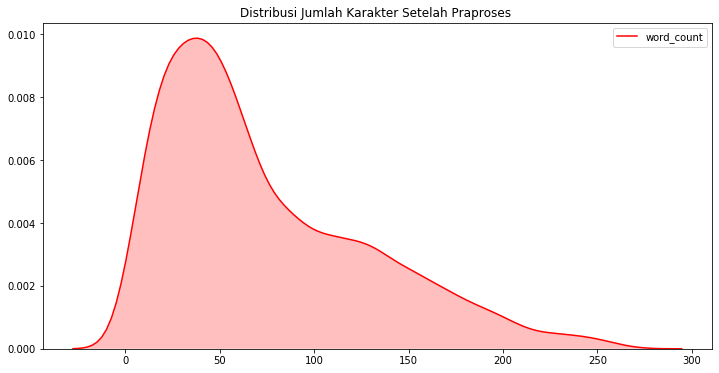

In [38]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(df['word_count'], shade=True, color="r").set_title('Distribusi Jumlah Karakter Setelah Praproses ')

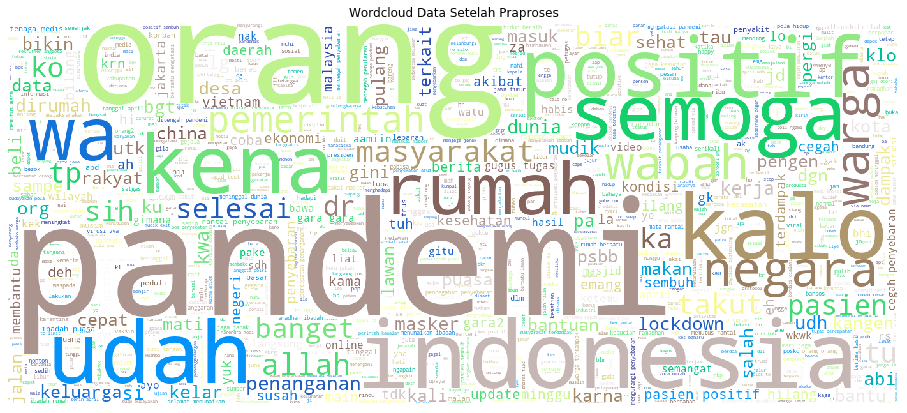

In [39]:
wc = WordCloud(height=600,repeat=False,width=1400,max_words=1000,stopwords=st_words,colormap='terrain',background_color='white',mode='RGBA').generate(' '.join(df['text'].dropna().astype(str)))
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.title('Wordcloud Data Setelah Praproses')
plt.axis('off')
plt.show()

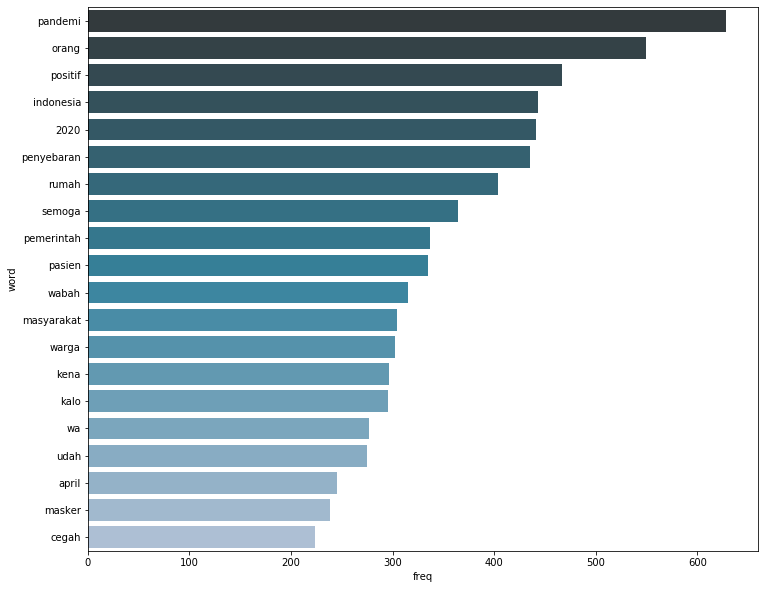

In [40]:
cv = CountVectorizer()
bow = cv.fit_transform(df['text'])
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])

fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(y="word", x="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax,orient='h')
plt.show();

In [41]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
def get_top_tweet_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
def get_top_tweet_unigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(1, 1)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

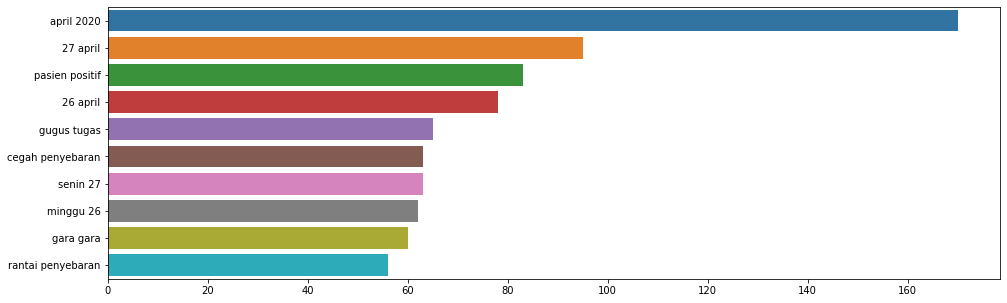

In [42]:
plt.figure(figsize=(16,5))
top_tweet_bigrams=get_top_tweet_bigrams(df['text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

In [43]:
!pip install googletrans
import pandas as pd
from googletrans import Translator
translator = Translator()
#df["Translate"] = df["text"].map(lambda x: translator.translate(x,dest="en").text)

You should consider upgrading via the 'c:\users\julius chris\anaconda3\python.exe -m pip install --upgrade pip' command.


In [44]:
'''df["Translate"] = ""
for i in range(0,10000):
    eng_text = translator.translate(df.text.iloc[i], dest="en").text
    df.Translate[i] = eng_text'''

'df["Translate"] = ""\nfor i in range(0,10000):\n    eng_text = translator.translate(df.text.iloc[i], dest="en").text\n    df.Translate[i] = eng_text'

# SETELAH TRANSLATE

In [45]:
dt = pd.read_csv(r"C:\Users\Julius Chris\Desktop\translateful.csv")

In [46]:
dt.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1','id','date','rt','like','word_count'],axis=1,inplace=True)

In [47]:
nan = dt[dt.Translate.isna()].index
nan

Int64Index([273, 2331, 7548, 8873, 9900], dtype='int64')

In [48]:
dt.Translate[dt.Translate.isna()] = "NA"

## PREPROCESS (AGAIN)

In [49]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    #text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [50]:
dt["Translate"] = dt['Translate'].str.replace('[^\w\s]','')

In [51]:
dt['Translate'] = dt['Translate'].apply(lambda x:clean_text(x))

In [52]:
dt.iloc[84:90,2:7]

pre_processed_text  \
84  kujaribu siyo shida mkuu but hizo dawa nazo vi...   
85  balita penjual bakso positif covid tertularnya...   
86  ambil resiko keamanan virus corona mudah menye...   
87  program cetak sawah salah tujuannya menjamin k...   
88  harga siling rumah milik pulau pinang tanah rm...   
89  jijjji corona amiro bohot pyar krta h apna dhy...   

                                            Translate  
84  try not trouble the great but they spray harmf...  
85  toddlers positive meatball seller covid  tertu...  
86  download security risk corona virus is easily ...  
87  print program paddy any public purpose ensurin...  
88     ceiling price of a house owned island land      
89  jijji corona amiro love that loves has kept it...

## REMOVE STOPWORD

In [56]:
from nltk.corpus import stopwords
stop = stopwords.words("english")
stop.append('virus')
stop.append('corona')
stop.append('covid-19')
stop.append('covid')
stop.append('19')
stop.append('gara')

In [57]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)
dt.Translate = dt.Translate.apply(lambda x: preprocess(x))

## REMOVE NON-ENGLISH WORD

In [58]:
dt['eng']=""

In [59]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

for i in range (0,dt.shape[0]):
    sent = dt.Translate.iloc[i]
    dt.eng[i] = " ".join(w for w in nltk.wordpunct_tokenize(sent) \
             if w.lower() in words or not w.isalpha())

[nltk_data] Downloading package words to C:\Users\Julius
[nltk_data]     Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Text(0.5, 1.0, 'Unigram')

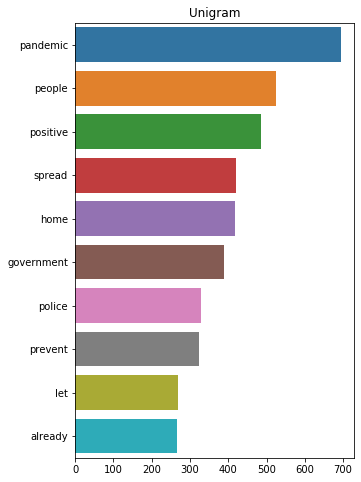

In [60]:
plt.figure(figsize=(5,8))
top_tweet_bigrams=get_top_tweet_unigrams(dt['eng'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)
plt.title("Unigram")

Text(0.5, 1.0, 'Bigram')

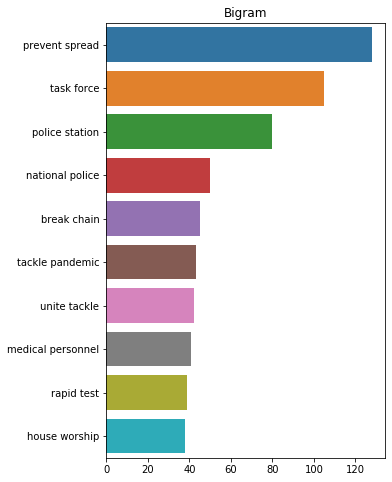

In [61]:
plt.figure(figsize=(5,8))
top_tweet_bigrams=get_top_tweet_bigrams(dt['eng'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)
plt.title("Bigram")

Text(0.5, 1.0, 'Trigram')

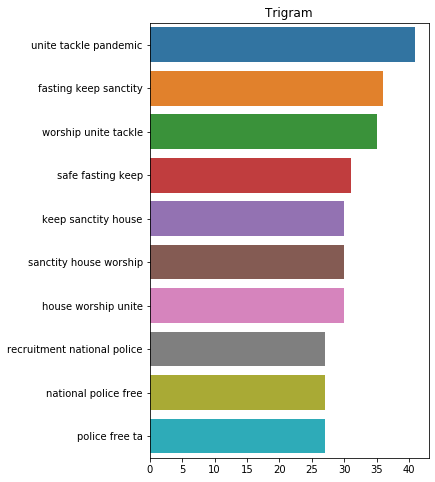

In [62]:
plt.figure(figsize=(5,8))
top_tweet_bigrams=get_top_tweet_trigrams(dt['eng'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)
plt.title("Trigram")

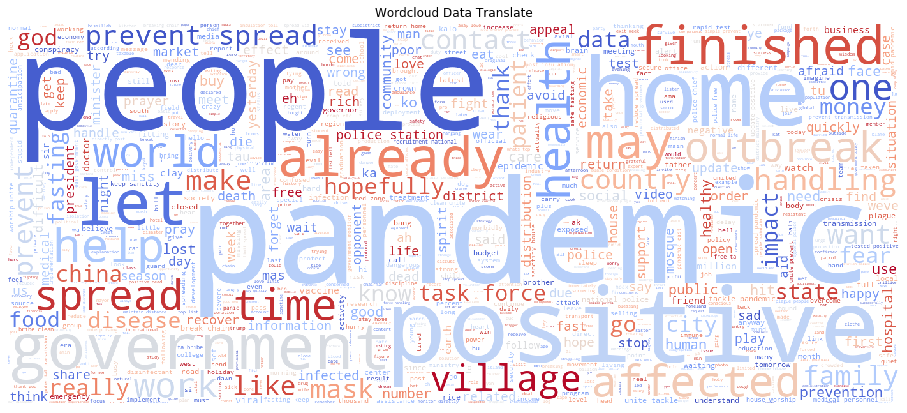

In [63]:
wc = WordCloud(height=600,repeat=False,width=1400,max_words=1000,stopwords=st_words,colormap='coolwarm',background_color='white',mode='RGBA').generate(' '.join(dt['eng'].dropna().astype(str)))
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.title('Wordcloud Data Translate')
plt.axis('off')
plt.show()

## POLARITY AND SUBJECTIVITY

In [64]:
dt['subjectivity']=""
dt['polarity']=""

In [65]:
from textblob import TextBlob
dt['polarity'] = dt['eng'].apply(lambda x: 'NaN' if pd.isnull(x) else TextBlob(x).sentiment.polarity)
dt['subjectivity'] = dt['eng'].apply(lambda x: 'NaN' if pd.isnull(x) else TextBlob(x).sentiment.subjectivity)

In [66]:
pd.set_option('display.max_rows', 10000)

In [67]:
print("Polarity Result:\n")
print("Positive: ",dt.polarity[dt.polarity > 0].count())
print("Neutral: ",dt.polarity[dt.polarity == 0].count())
print("Negative: ",dt.Translate[dt.polarity < 0].count())
print("Mean: ",dt.polarity.mean())

Polarity Result:

Positive:  2823
Neutral:  5652
Negative:  1525
Mean:  0.037655186322606116


In [68]:
print("Subjectivity Result:\n")
print("Mean: ",dt.subjectivity.mean())

Subjectivity Result:

Mean:  0.25368106177684735


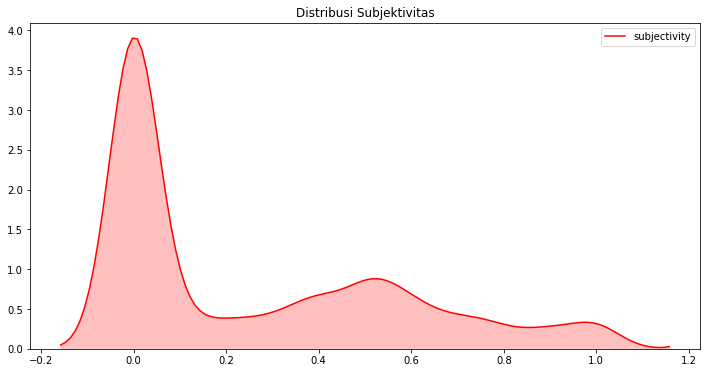

In [69]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(dt['subjectivity'], shade=True, color="r").set_title('Distribusi Subjektivitas')

In [70]:
for i in range (0,dt.shape[0]):
    if dt.polarity[i] > 0:
        dt.polarity[i] = 1
    elif dt.polarity[i] < 0:
        dt.polarity[i] = -1

C:\Users\Julius Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Julius Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0.5, 1.0, 'Polarity Barplot')

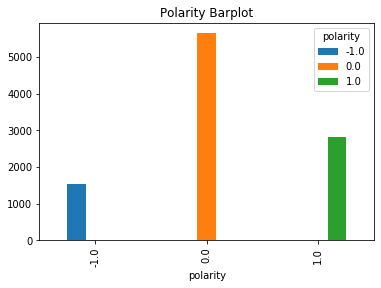

In [71]:
pd.crosstab(dt.polarity, dt.polarity).plot(kind='bar', stacked = False)
plt.title('Polarity Barplot')

In [72]:
dt.groupby('polarity').mean()['subjectivity']

polarity
-1.0    0.560658
 0.0    0.034566
 1.0    0.526546
Name: subjectivity, dtype: float64

# STEMMING

In [73]:
'''from nltk.stem import PorterStemmer 
porter_stemmer = PorterStemmer()
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

dt['eng'] = dt['eng'].apply(stem_sentences)'''

"from nltk.stem import PorterStemmer \nporter_stemmer = PorterStemmer()\ndef stem_sentences(sentence):\n    tokens = sentence.split()\n    stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]\n    return ' '.join(stemmed_tokens)\n\ndt['eng'] = dt['eng'].apply(stem_sentences)"

## DROP NAN

In [74]:
#dt.drop(nan,axis=0,inplace=True)

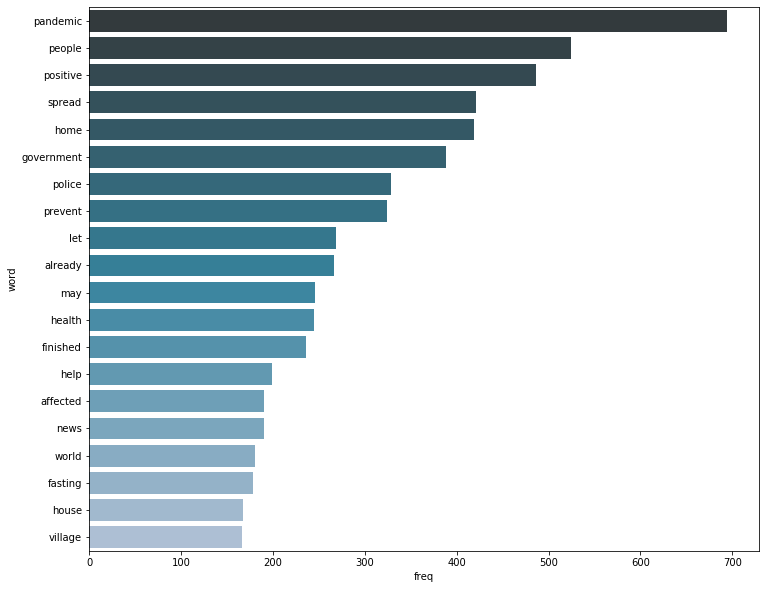

In [75]:
cv = CountVectorizer()
bow = cv.fit_transform(dt['eng'])
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])

fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(y="word", x="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax,orient='h')
plt.show();

In [76]:
dt.eng

0       government normal life raise collective consci...
1                                                   choke
2         mutual assistance unit pandemic people carrying
3       worship normal regime program distance worship...
4       china cho united us trump ambition rule world ...
5       home money coming home let money get trying pl...
6       finished seek choose one thing neither herbal ...
7                                       stupid human kalo
8                      giving avoid different people plus
9       fasting swami man wife catch unscrupulous village
10                   may return home quickly finished job
11                         deserted hotel restaurant laid
12                             said dew intriguing thrill
13      confused dogs sma might meet eh later teaching...
14                                              open news
15                                               finished
16                          million alibi impact outbreak
17            

In [77]:
Positive_sent = dt[dt['polarity']== 1]
Negative_sent = dt[dt['polarity']== -1]
Neutral_sent = dt[dt['polarity']== 0]

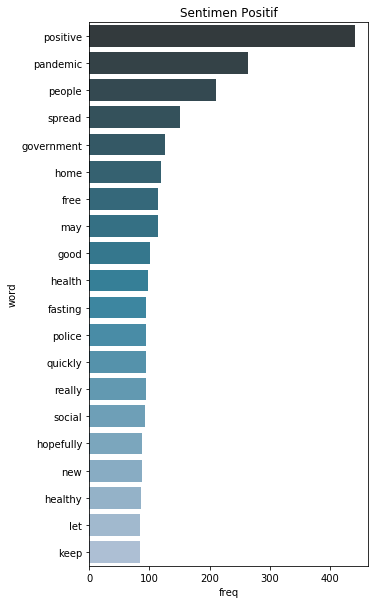

In [78]:
cv = CountVectorizer()
bow = cv.fit_transform(Positive_sent['eng'])
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])

fig, ax = plt.subplots(figsize=(5, 10))
sns.barplot(y="word", x="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax,orient='h')
plt.title("Sentimen Positif")
plt.show();


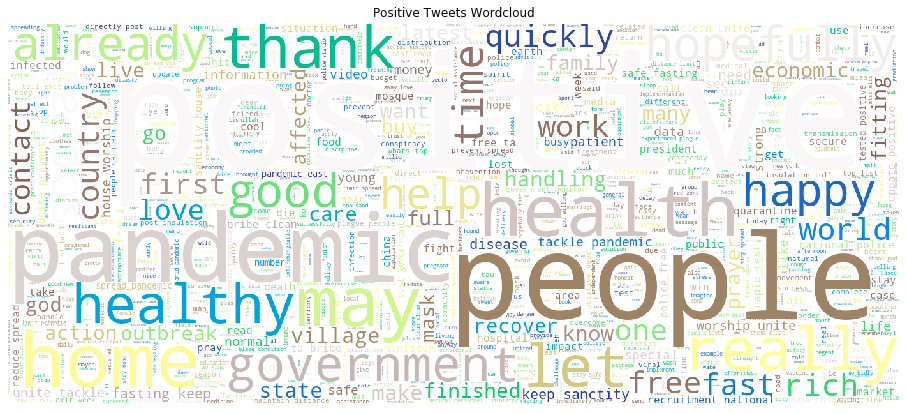

In [79]:
wc = WordCloud(height=600,repeat=False,width=1400,max_words=1000,stopwords=st_words,colormap='terrain',background_color='white',mode='RGBA').generate(' '.join(Positive_sent['eng'].dropna().astype(str)))
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.title('Positive Tweets Wordcloud')
plt.axis('off')
plt.show()

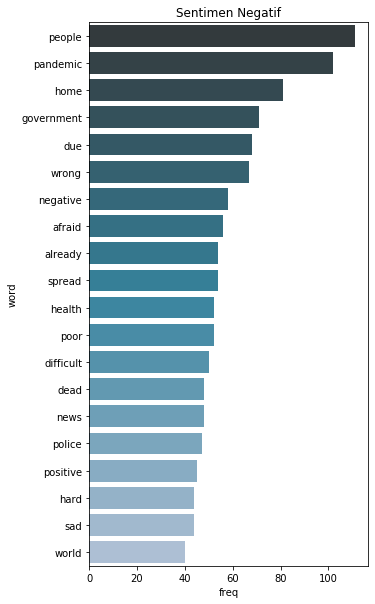

In [80]:
cv = CountVectorizer()
bow = cv.fit_transform(Negative_sent['eng'])
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])

fig, ax = plt.subplots(figsize=(5, 10))
sns.barplot(y="word", x="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax,orient='h')
plt.title("Sentimen Negatif")
plt.show();

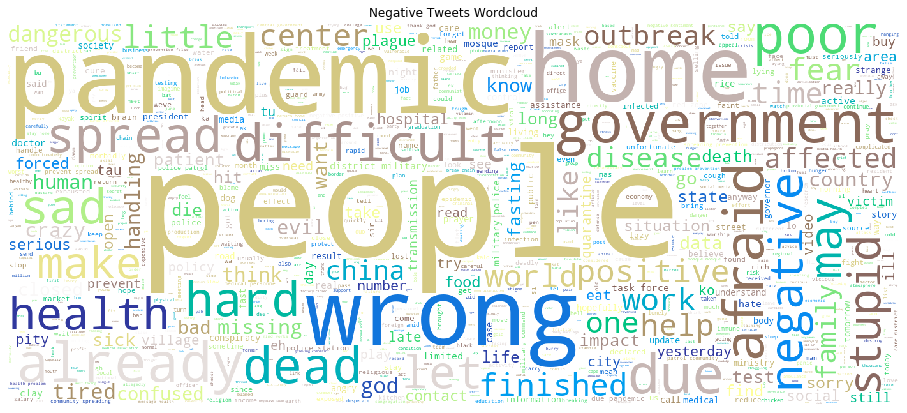

In [81]:
wc = WordCloud(height=600,repeat=False,width=1400,max_words=1000,stopwords=st_words,colormap='terrain',background_color='white',mode='RGBA').generate(' '.join(Negative_sent['eng'].dropna().astype(str)))
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.title('Negative Tweets Wordcloud')
plt.axis('off')
plt.show()

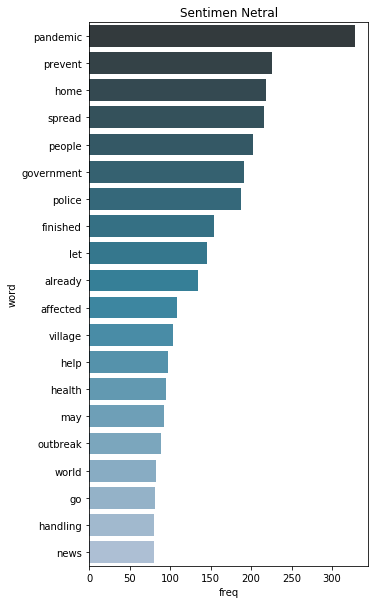

In [82]:
cv = CountVectorizer()
bow = cv.fit_transform(Neutral_sent['eng'])
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])

fig, ax = plt.subplots(figsize=(5, 10))
sns.barplot(y="word", x="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax,orient='h')
plt.title("Sentimen Netral")
plt.show();

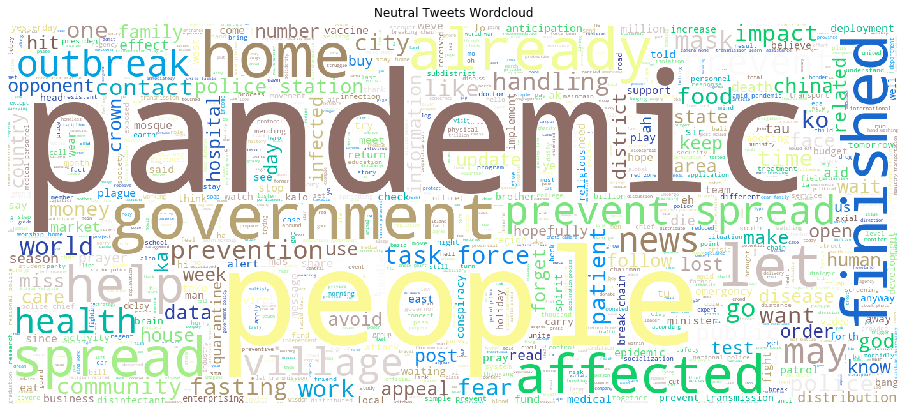

In [83]:
wc = WordCloud(height=600,repeat=False,width=1400,max_words=1000,stopwords=st_words,colormap='terrain',background_color='white',mode='RGBA').generate(' '.join(Neutral_sent['eng'].dropna().astype(str)))
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.title('Neutral Tweets Wordcloud')
plt.axis('off')
plt.show()

In [84]:
Positive_sent.eng

0       government normal life raise collective consci...
3       worship normal regime program distance worship...
4       china cho united us trump ambition rule world ...
10                   may return home quickly finished job
12                             said dew intriguing thrill
13      confused dogs sma might meet eh later teaching...
17                        stay safe need stay home really
22                enhance outbreak switch foundation love
24                              brave leader money people
26                            cool opponent living people
30      swatch regent minister evidence anticipation e...
31      ako mother even used mask surrounding brain ba...
34      one front line fighting infection musical star...
40                   income bum cleaning service eat live
42      liberal democratic power qualify see poor perf...
54      tau secure deployment safety zone track locati...
58                          miss u much obliged able meet
60      alread

In [85]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Julius
[nltk_data]     Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [86]:
dt.head()

screen_name                                               text  \
0  selvijn_ellias  siiip target pemerintah juni angka corona turu...   
1    irenelevinaa                                     tes corona cuk   
2    fahmihusen98  assalamualaikum wr wb gotong royong melawan co...   
3      ErpelaHeri  covid19 urusan ibadah umat atur biarjan berjal...   
4      aschareev2  china cho who billgate partai demokrat us bers...   

                                  pre_processed_text  \
0  siiip target pemerintah juni angka corona turu...   
1                                     tes corona cuk   
2  assalamualaikum wr wb gotong royong melawan co...   
3  covid urusan ibadah umat atur biarjan berjalan...   
4  china cho who billgate partai demokrat us bers...   

                                           Translate  \
0  siiip government targets numbers juli juni nor...   
1                                        tests choke   
2  assalamualaikum wr wb mutual assistance ksr pm...   
3  affairs worship normal regime biarjan program ...   
4  china cho billgate democrats united us attacki...   

                                                 eng  subjectivity  polarity  
0  government normal life raise collective consci...      0.650000       1.0  
1                                              choke      0.000000       0.0  
2    mutual assistance unit pandemic people carrying      0.000000       0.0  
3  worship normal regime program distance worship...      0.650000       1.0  
4  china cho united us trump ambition rule world ...      0.733333       1.0

In [87]:
dt.text[dt['text'].isna()] = "NA"

C:\Users\Julius Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [88]:
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline
# Creating token for the clean tweets
dt['token'] = dt['eng'].apply(lambda x: word_tokenize(x))
dt['tokent'] = dt['text'].apply(lambda x: word_tokenize(x))

C:\Users\Julius Chris\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [89]:
dt[dt.polarity ==1]

screen_name                                               text  \
0      selvijn_ellias  siiip target pemerintah juni angka corona turu...   
3          ErpelaHeri  covid19 urusan ibadah umat atur biarjan berjal...   
4          aschareev2  china cho who billgate partai demokrat us bers...   
10     fatwakurahman5  1 semoga corona cepat selesai 2 pulang kampung...   
12     lemonsqquizeee  bilang kek gini dew corona pas lgi seru seruny...   
13       Auliafadhly1  bingung anj pindah sma niat pingin ketemu teme...   
17       HildeMachele  stay safe kama huna ulazima wa kutoka kaa nyum...   
22     KajianKantoran  menyempurnakan taqwa wabah covid 19 kegiatan b...   
24        msiagazette   pemimpin kena berani korban duit rakyat covid 19   
26       TribunRakyat              keren yuk lawan covid 19 hidup rakyat   
30           dezkoto2  bentar kt carikan dl bupati kr menteri pinter2...   
31           zaphanay  mama ako kagawia hata jirani barakoa moja tumi...   
34       SafariMedia_  davido mmoja wa mastaa ambao wapo mstari wa mb...   
40         AtepMonako  penghasilan 500rb gelandangan gara2 si covid19...   
42          SenyumAee  contoh demokratis jabatan kuasa leluasa lolos ...   
54           indieeds  apps ngasi tau lg zona aman aman penyebaran co...   
58          amarafai0  huhu i miss u so much klo corona kelar wajib k...   
60         sandhikapr  udah mikir ide keras persiapan udh mateng udh ...   
63      Peppermintea1                    hmmmmmm selesai corona langsung   
66         HarisLANjr  lindungi tercinta penyebaran covid 19 mengundu...   
69         matafakta1  polisi amankan puluhan motor balap liar diteng...   
70          xoxodinii               banget kakmels tp gimana corona gini   
78       Yovi96430326  semoga wabah virus cpat hilang ngajak anak2 ya...   
80     sadboy_katanya            jaga jarak karna covid 19 cemburu sadar   
81           ntvkenya  watu 12 zaidi wana corona visa vipya vimepatik...   
84         LeoellyLeo  kujaribu siyo shida mkuu but hizo dawa nazo vi...   
85         Berita9com  balita penjual bakso positif covid 19 tertular...   
86            Stenky0  ambil resiko keamanan virus corona mudah menye...   
89      branwal_sagar  jijjji corona amiro bohot pyar krta h apna dhy...   
91          chewanie_                              wkwk kasih loh corona   
95           azlinda2  cari duit rumah musim covid19 usaha tangga kej...   
96           setiyan_  total covid 19 indonesia positif 8 607 meningg...   
99      merdekadotcom      pemerintah mudik jamin aman tertular covid 19   
100         weldimark  puasa 2020 berkesan cerita seru keturunan semo...   
106           iis1924  penanganan pandemi covid 19 muncul kritik staf...   
114     Untrustwortea  pandemik covid19 amp pkp membuatkan urusan per...   
115   RajeevSaraswat3  sahi kaha waqt badltey der nahi lagta jb coron...   
120      satgas_sirat  update terbaru covid 19 indonesia 26 april 202...   
130           DetaxId  hoax petugas kebersihan sman 10 yogyakarta pos...   
131    deni_murniwati  see you soon ka sawunggalih pse gb semoga leka...   
141   Akuoran40913322  semoga wabah covid 19 musnah semoga bumi pulih...   
143          detikcom  twindy rarasati mengumumkan instagram positif ...   
146        gitawekads  berkat corona koki it youtuber editor go clean...   
148      MedTweetMYHQ  laporan projek utiliti klinik kesihatan tabung...   
154        Beritasatu             4 wn india yogyakarta positif covid 19   
155       KiranaMelya    jokowi rakyat disiplin corona juli hidup normal   
157   dhitanursavitri  hasil donasi sintesa ui peduli disalurkan tega...   
159      kebenaran_21  update corona ri 8 882 positif 1 107 sembuh 74...   
165       Alpha_mikee  good point patut apresiasi bunda neni walikota...   
166       kikirizkeyy     sabar yaa habis corona bebas pergi kemana hehe   
168       picangmoyen  pgn sushi jujur kayanya abis corona w mukbang ...   
176         gaddafee3  ai daman duk wanda kika ganshi da c

In [405]:
dt[dt.polarity == -1].count()

screen_name           37
text                  37
pre_processed_text    37
Translate             37
eng                   37
token                 37
tokent                37
subjectivity          37
polarity              37
dtype: int64

# Coba LDA

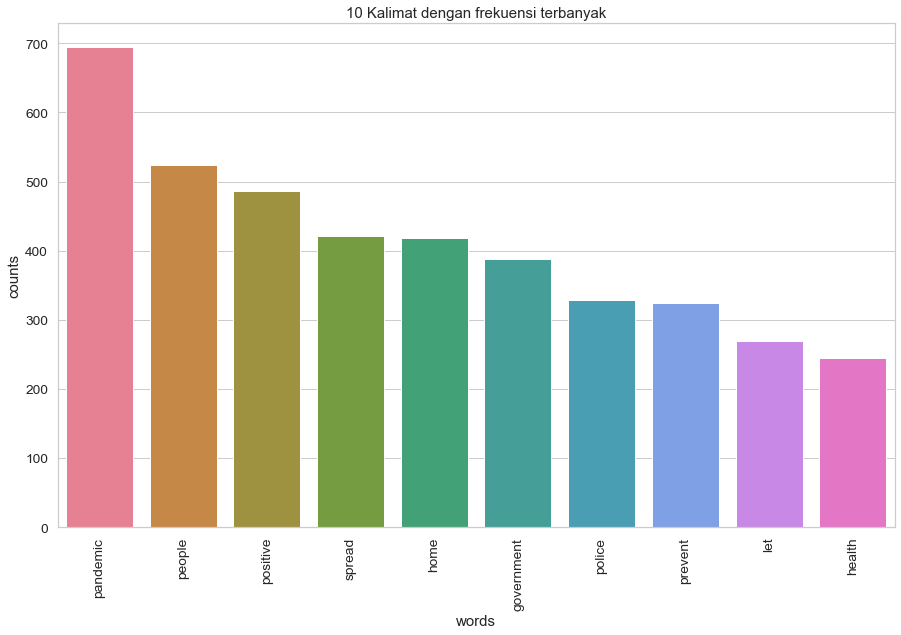

In [150]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 Kalimat dengan frekuensi terbanyak')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(dt['eng'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [431]:
text_list = dt.token
import gensim
#Create Bigram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

In [432]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary(2443 unique tokens: ['government', 'life', 'normal', 'normal_life', 'normal_life_normal_life']...)


In [433]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
#The function doc2bow converts document (a list of words) into the bag-of-words format
'''The function doc2bow() simply counts the number of occurrences of each distinct word, 
converts the word to its integer word id and returns the result as a sparse vector. 
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, 
the words computer (id 0) and human (id 1) appear once; 
the other ten dictionary words appear (implicitly) zero times.'''
print(len(doc_term_matrix))
print(doc_term_matrix[100])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

10000
[(65, 2), (133, 1), (206, 1), (393, 1), (394, 1), (395, 1), (396, 1), (397, 1), (398, 1)]


In [434]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

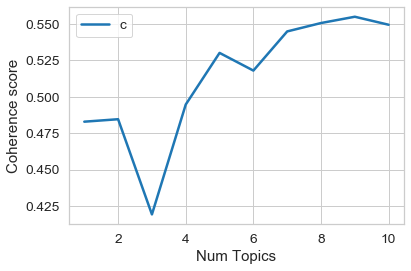

In [435]:
start=1
limit=11
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [436]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.482863
Num Topics = 2  has Coherence Value of 0.48455
Num Topics = 3  has Coherence Value of 0.419333
Num Topics = 4  has Coherence Value of 0.494631
Num Topics = 5  has Coherence Value of 0.529988
Num Topics = 6  has Coherence Value of 0.517871
Num Topics = 7  has Coherence Value of 0.544705
Num Topics = 8  has Coherence Value of 0.550456
Num Topics = 9  has Coherence Value of 0.55476
Num Topics = 10  has Coherence Value of 0.549272


In [355]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
people home china god fear miss work chain die news

Topic #1:
police spread prevent pandemic government village force task update week

Topic #2:
positive fasting pandemic house news home money country government worship

Topic #3:
pandemic medical government social handling minister new patient hospital affected

Topic #4:
finished positive let want people world pandemic plague conspiracy meet


In [437]:
docs = dt.token
%pylab inline
from gensim.models import Phrases
# Add bigrams and trigrams to docs (only ones that appear 10 times or more).
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

Populating the interactive namespace from numpy and matplotlib


C:\Users\Julius Chris\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['step']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [438]:
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
print('Number of unique words in initital documents:', len(dictionary))

# Filter out words that occur less than 10 documents, or more than 20% of the documents.
dictionary.filter_extremes(no_below=10, no_above=0.2)
print('Number of unique words after removing rare and common words:', len(dictionary))

Number of unique words in initital documents: 8097
Number of unique words after removing rare and common words: 1451


In [439]:
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [440]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 1451
Number of documents: 10000


In [441]:
from gensim.models import LdaModel

In [461]:
# Set training parameters.
num_topics = 5
chunksize = 500 # size of the doc looked at every pass
passes = 20 # number of passes through documents
iterations = 400
eval_every = 1  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

lda_model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

TypeError: __init__() got an unexpected keyword argument 'n_topics'

In [458]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))

# See model parameters
pprint(lda_model.get_params())

AttributeError: 'LdaModel' object has no attribute 'perplexity'

In [430]:
# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(text_list)

NameError: name 'data_vectorized' is not defined

In [ ]:
GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_topics': [10, 15, 20, 25, 30], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [453]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=dt.token, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4695793979202797


In [448]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [450]:
pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

C:\Users\Julius Chris\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.010672  0.040385       1        1  26.595491
1      0.326387 -0.168864       2        1  21.210993
0      0.091399  0.329014       3        1  17.836197
2     -0.155009 -0.255182       4        1  17.505066
3     -0.273448  0.054646       5        1  16.852249, topic_info=     Category         Freq                                               Term  \
179   Default  1348.000000                                     prevent_spread   
210   Default  1214.000000                                         task_force   
727   Default  1045.000000                                     police_station   
180   Default   884.000000                      prevent_spread_prevent_spread   
662   Default   758.000000                              task_force_task_force   
663   Default   530.000000                   task_force_task_force_task_force   
728   Default   511.000000                      police_station_police_station   
203   Default   651.000000                                        break_chain   
370   Default   431.000000       prevent_spread_prevent_spread_prevent_spread   
108   Default   430.000000                               prevent_transmission   
797   Default   378.000000                                    tackle_pandemic   
470   Default   339.000000                                  medical_personnel   
804   Default   330.000000                      worship_unite_tackle_pandemic   
12    Default   534.000000                                             people   
1100  Default   351.000000                                whats_top_list_hell   
623   Default   306.000000                                      reduce_spread   
11    Default   716.000000                                           pandemic   
561   Default   291.000000                                     breaking_chain   
60    Default   331.000000                                        return_home   
884   Default   286.000000                                       police_chief   
679   Default   283.000000                                    national_police   
789   Default   273.000000                        fasting_keep_sanctity_house   
729   Default   274.000000       police_station_police_station_police_station   
805   Default   264.000000  worship_unite_tackle_pandemic_safe_h_fasting_k...   
799   Default   264.000000  tackle_pandemic_safe_h_fasting_keep_sanctity_h...   
798   Default   264.000000                             tackle_pandemic_safe_h   
792   Default   264.000000   safe_h_fasting_keep_sanctity_house_worship_unite   
318   Default   481.000000                                           positive   
471   Default   261.000000                medical_personnel_medical_personnel   
664   Default   264.000000  task_force_task_force_task_force_task_force_ta...   
203    Topic1   650.270264                                        break_chain   
445    Topic1   341.135132                                         rapid_test   
1010   Topic1   321.096100                            break_chain_break_chain   
87     Topic1   257.951904                                          stay_home   
1023   Topic1   218.467834                break_chain_break_chain_break_chain   
446    Topic1   192.204025                              rapid_test_rapid_test   
130    Topic1   187.195755                                               help   
657    Topic1   184.740250                                       good_morning   
39     Topic1   171.921921                                                 go   
358    Topic1   160.476898                                             please   
868    Topic1   157.002243                                    tested_positive   
185    Topic1   142.579865                                          hopefully   
90     Topic1   137.820984                                               fear   
201    Topic1  

In [428]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=dt.token, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.728170554643874


AttributeError: 'dict' object has no attribute 'id2token'

In [388]:
from sklearn.metrics.pairwise import cosine_similarity

p_df = docs

docs1 = p_df.apply(lambda l: l[:int0(len(l)/2)])
docs2 = p_df.apply(lambda l: l[int0(len(l)/2):])

In [389]:
corpus1 = [dictionary.doc2bow(doc) for doc in docs1]
corpus2 = [dictionary.doc2bow(doc) for doc in docs2]

# Using the corpus LDA model tranformation
lda_corpus1 = model[corpus1]
lda_corpus2 = model[corpus2]

In [390]:
from collections import OrderedDict
def get_doc_topic_dist(model, corpus, kwords=False):
    
    '''
    LDA transformation, for each doc only returns topics with non-zero weight
    This function makes a matrix transformation of docs in the topic space.
    '''
    top_dist =[]
    keys = []

    for d in corpus:
        tmp = {i:0 for i in range(num_topics)}
        tmp.update(dict(model[d]))
        vals = list(OrderedDict(tmp).values())
        top_dist += [array(vals)]
        if kwords:
            keys += [array(vals).argmax()]

    return array(top_dist), keys

In [456]:
top_dist1, _ = get_doc_topic_dist(lda_model, lda_corpus1)
top_dist2, _ = get_doc_topic_dist(lda_model, lda_corpus2)

print("Intra similarity: cosine similarity for corresponding parts of a doc(higher is better):")
print(mean([cosine_similarity(c1.reshape(1, -1), c2.reshape(1, -1))[0][0] for c1,c2 in zip(top_dist1, top_dist2)]))

random_pairs = np.random.randint(0, len(dt), size=(400, 2))

print("Inter similarity: cosine similarity between random parts (lower is better):")
print(np.mean([cosine_similarity(top_dist1[i[0]].reshape(1, -1), top_dist2[i[1]].reshape(1, -1)) for i in random_pairs]))

Intra similarity: cosine similarity for corresponding parts of a doc(higher is better):
0.9938168
Inter similarity: cosine similarity between random parts (lower is better):
0.990259


In [392]:
def explore_topic(lda_model, topic_number, topn, output=True):
    """
    accept a ldamodel, atopic number and topn vocabs of interest
    prints a formatted list of the topn terms
    """
    terms = []
    for term, frequency in lda_model.show_topic(topic_number, topn=topn):
        terms += [term]
        if output:
            print(u'{:20} {:.3f}'.format(term, round(frequency, 3)))
    
    return terms

In [393]:
topic_summaries = []
print(u'{:20} {}'.format(u'term', u'frequency') + u'\n')
for i in range(num_topics):
    print('Topic '+str(i)+' |---------------------\n')
    tmp = explore_topic(model,topic_number=i, topn=10, output=True )
#     print tmp[:5]
    topic_summaries += [tmp[:5]]
    print

term                 frequency

Topic 0 |---------------------

people               0.048
already              0.024
may                  0.023
health               0.022
one                  0.014
country              0.013
god                  0.013
fear                 0.012
patient              0.011
really               0.011
Topic 1 |---------------------

let                  0.032
affected             0.022
please               0.018
food                 0.017
medical              0.014
family               0.014
test                 0.013
via                  0.013
miss                 0.013
medical_personnel    0.013
Topic 2 |---------------------

positive             0.067
finished             0.032
want                 0.023
china                0.019
work                 0.019
post                 0.018
week                 0.017
update               0.016
district             0.014
eat                  0.012
Topic 3 |---------------------

pandemic             0.056
hom

In [171]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english',lowercase=False)
bow_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=False, max_df=0.9, max_features=1000, min_df=2,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [172]:
# bag-of-words feature matrix - For columns "combine_df['tweet_stemmed']"
bow = bow_vectorizer.fit_transform(dt['eng'])
bow

<10000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 45373 stored elements in Compressed Sparse Row format>

In [173]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf_vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=1000,
                min_df=2, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [174]:
tfidf = tfidf_vectorizer.fit_transform(dt['eng'])
tfidf

<10000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 45373 stored elements in Compressed Sparse Row format>